### Data Preparation

**Import Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)
sns.set_theme(style="whitegrid")
import matplotlib.dates as mdates

# !pip install keras-tuner
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
import random, time

**Read the files**

In [5]:
set1 = pd.read_csv('../Data/SET_main.csv')

# This file is consist of data that have Nan values
macro = pd.read_csv('../Data/macro_data.csv')
sp500 = pd.read_csv('../Data/sp500_main.csv')

# stock name
set_name = set1

*Preparing the data as inputs*

In [7]:
macro= macro.set_index('Date')
macro

,Interest_Rate,GDP,Unemployment,Inflation_x
Date,,,,
2012-10-01,NaN,16420.419,NaN,NaN
2012-12-01,0.16,16420.419,7.9,231.221
2013-01-01,0.14,16648.189,8.0,231.679
2013-02-01,0.15,16648.189,7.7,232.937
2013-03-01,0.14,16648.189,7.5,232.282
...,...,...,...,...
2024-07-01,5.33,29354.321,4.3,313.534
2024-08-01,5.33,29354.321,4.2,314.121
2024-09-01,5.13,29354.321,4.1,314.686


In [8]:
set1 = set1.set_index('Date')
set1

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,HMPRO.BK,INTUCH.BK,IVL.BK,KBANK.BK,KTB.BK,MINT.BK,PTT.BK,PTTEP.BK,SCC.BK,TRUE.BK,TTB.BK
Date,,,,,,,,,,,,,,,,,,,,
2014-01-02,115.707695,13.004045,112.167664,8.865041,68.680244,33.136929,22.704105,31.580967,4.015339,4.772995,36.063667,14.913610,107.741776,9.801532,15.467829,16.889353,93.353264,263.643036,5.398062,1.198794
2014-01-03,121.276527,12.870900,113.856918,8.824374,69.914032,33.136929,22.704105,31.159885,3.846470,4.633434,36.908916,14.837523,111.814484,9.864767,15.223605,16.519508,92.148727,262.951050,5.318678,1.186436
2014-01-06,124.370323,12.648986,117.235466,9.678345,69.091530,33.344040,21.773605,31.580967,3.696364,4.605521,37.190655,14.913610,116.257446,9.991237,16.363337,16.272951,89.137291,266.411011,5.477446,1.217332
2014-01-07,129.939133,13.447869,120.276161,9.556350,68.474625,33.965351,22.704105,32.844200,3.771417,4.717172,38.176777,15.446239,119.959915,10.244180,17.096024,17.320827,92.449844,269.178833,5.636212,1.229691
2014-01-08,127.464096,12.870900,119.938301,9.312360,67.446480,33.551147,22.145803,32.633663,3.790180,4.633434,38.035904,15.978869,119.959915,9.991237,16.526155,17.567392,94.256668,271.254791,5.398062,1.248229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-03,296.000000,61.209999,150.500000,26.000000,212.000000,63.750000,24.200001,60.500000,151.000000,9.900000,102.500000,24.600000,153.500000,20.299999,27.750000,32.250000,128.500000,184.000000,11.900000,1.790000
2024-12-04,289.000000,61.500000,151.500000,25.750000,211.000000,64.000000,24.100000,60.500000,151.000000,9.700000,100.000000,24.500000,155.000000,20.600000,28.000000,32.250000,128.000000,183.000000,12.100000,1.780000
2024-12-06,295.000000,61.000000,152.000000,25.500000,210.000000,63.000000,24.100000,60.250000,150.500000,9.700000,102.500000,25.250000,156.000000,20.700001,27.500000,32.250000,128.000000,183.500000,11.800000,1.830000


In [9]:
# Loop through each unique ticker (stock) in the DataFrame
indicator = pd.DataFrame()
for ticker in set1.columns:
    # Calculate SMAs 
    indicator[f'{ticker}_SMA3'] = set1[ticker].rolling(window=3).mean()
    indicator[f'{ticker}_SMA20'] = set1[ticker].rolling(window=20).mean()
    indicator[f'{ticker}_SMA50'] = set1[ticker].rolling(window=50).mean()
    indicator[f'{ticker}_SMA100'] = set1[ticker].rolling(window=100).mean()
    indicator[f'{ticker}_SMA200'] = set1[ticker].rolling(window=200).mean()
    
    # Calculate EMA
    indicator[f'{ticker}_EMA3'] = set1[ticker].ewm(span=3, adjust=False).mean()
    indicator[f'{ticker}_EMA12'] = set1[ticker].ewm(span=12, adjust=False).mean()
    indicator[f'{ticker}_EMA26'] = set1[ticker].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    indicator[f'{ticker}_MACD'] = indicator[f'{ticker}_EMA12'] - indicator[f'{ticker}_EMA26']
    
    # Calculate Signal line (9-day EMA of the MACD)
    indicator[f'{ticker}_signal'] = indicator[f'{ticker}_MACD'].ewm(span=9, adjust=False).mean()
    
    # Concatenate each ticker's results into the final indicator DataFrame
    indicator = pd.concat([indicator, set1], axis=1)

In [10]:
indicator = indicator.dropna()

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Merge all the files that have X-variable (features)
features_df = pd.merge(macro, indicator, on='Date', how='outer')
features_df = features_df.fillna(method='ffill').dropna()

In [12]:
# drop the same column names
features_df = features_df.loc[:, ~features_df.columns.duplicated()]

In [13]:
# Make the rows number the same with target and features files
# set the index to the format Datetime
set1.index = pd.to_datetime(set1.index)
features_df.index = pd.to_datetime(features_df.index)

# Align the two DataFrames by finding the intersection of their indices
common_index = set1.index.intersection(features_df.index)

# Reindex both DataFrames to the common index
set1 = set1.loc[common_index]
features_df = features_df.loc[common_index]

# Merge the table 
df = pd.concat([set1, features_df], axis=1)

In [14]:
feature_columns_list = [col for col in df.columns if col not in set1.columns]

### Modeling 

**Data Preparation**

In [17]:
def data_prep(df, stock_columns, feature_columns, test_size, window_size):
    results = {}

    # Ensure feature_columns is a clean list of feature names
    if not isinstance(feature_columns, list):
        raise ValueError("`feature_columns` should be a list of feature names.")
    
    for stock in stock_columns:
        print(f"Processing stock: {stock}")
        
        # Ensure the index is in datetime format
        df.index = pd.to_datetime(df.index)

        # Plot training and test sets for the target variable
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], df[stock][:-test_size], color='black', label="Training set")
        plt.plot(df.index[-test_size:], df[stock][-test_size:], color='blue', label="Test set")
        plt.title(f"{stock} Training and Test Sets", fontsize=15)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.xlim(df.index.min(), df.index.max())
        plt.grid(color="lightgray")
        plt.gca().set_facecolor("white")
        plt.legend(loc="upper left")
        plt.tight_layout()
        plt.show()

        # Combine feature columns with the target stock column
        selected_columns = feature_columns + [stock]
        
        # Ensure selected_columns exist in the dataframe
        missing_cols = [col for col in selected_columns if col not in df.columns]
        if missing_cols:
            raise KeyError(f"Missing columns in dataframe: {missing_cols}")
        
        data = df[selected_columns].copy()
        
        # Scale the data
        scaler = MinMaxScaler()
        data_scaled = scaler.fit_transform(data)
        
        # Split into training and testing sets
        train_data = data_scaled[:-test_size]
        test_data = data_scaled[-test_size-window_size:]
        
        # Separate features (X) and target (y) for training
        X_train, y_train = [], []
        for i in range(window_size, len(train_data)):
            X_train.append(train_data[i-window_size:i, :-1])  # All features except the target
            y_train.append(train_data[i, -1])               # Only the target stock column
        
        # Separate features (X) and target (y) for testing
        X_test, y_test = [], []
        for i in range(window_size, len(test_data)):
            X_test.append(test_data[i-window_size:i, :-1])  # All features except the target
            y_test.append(test_data[i, -1])               # Only the target stock column
        
        # Convert to numpy arrays for model compatibility
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        y_train = np.array(y_train).reshape(-1, 1)
        y_test = np.array(y_test).reshape(-1, 1)

        print(f'{stock} - X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
        print(f'{stock} - X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}')
        
        # Store results for the current stock
        results[stock] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'scaler': scaler  # Save the scaler for potential inverse transformation
        }
    
    return results


*Applying the function for SET1 (Stock exchange of Thailand)*

In [19]:
stock_column = list(set1.columns)
test_size = 360 
window_size = 60

In [20]:
# Make sure feature_columns is a list of strings, not DataFrame columns
print(f"Type of feature_columns: {type(feature_columns_list)}")
print(f"First element in feature_columns: {feature_columns_list[0]}")

Type of feature_columns: <class 'list'>
First element in feature_columns: Interest_Rate


Processing stock: ADVANC.BK


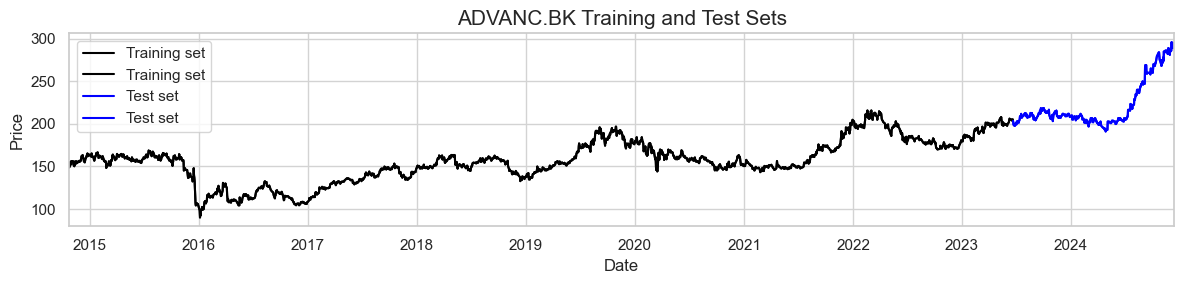

ADVANC.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
ADVANC.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: AOT.BK


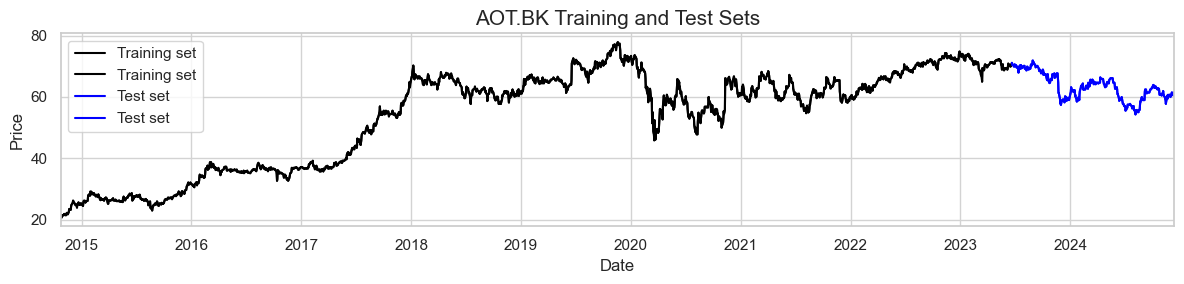

AOT.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
AOT.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: BBL.BK


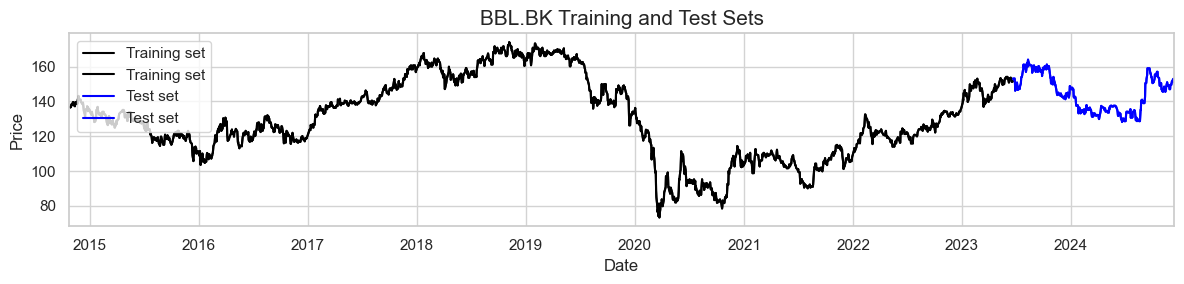

BBL.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
BBL.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: BDMS.BK


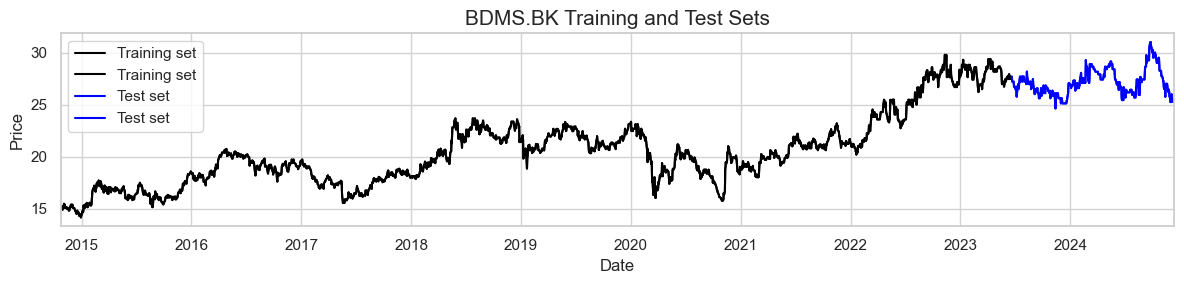

BDMS.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
BDMS.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: BH.BK


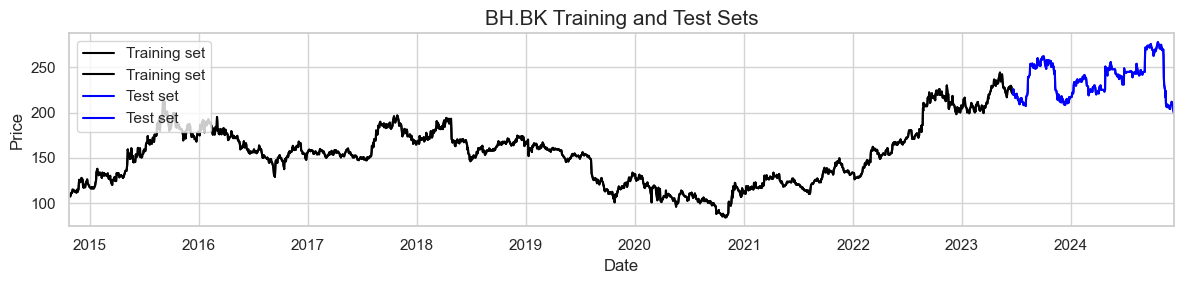

BH.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
BH.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: CPALL.BK


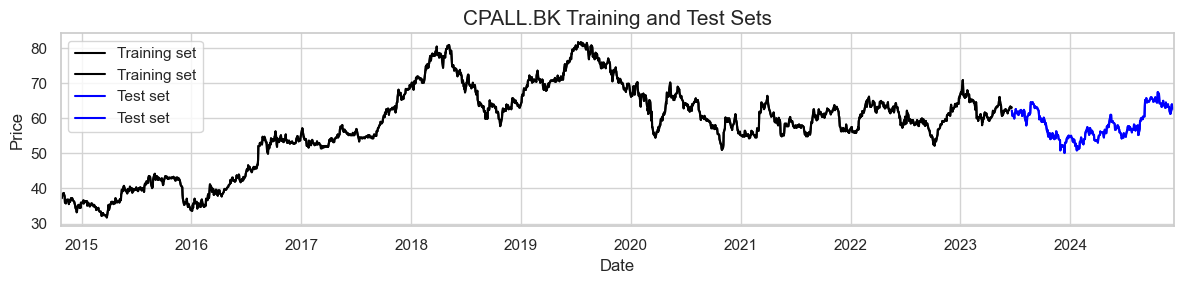

CPALL.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
CPALL.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: CPF.BK


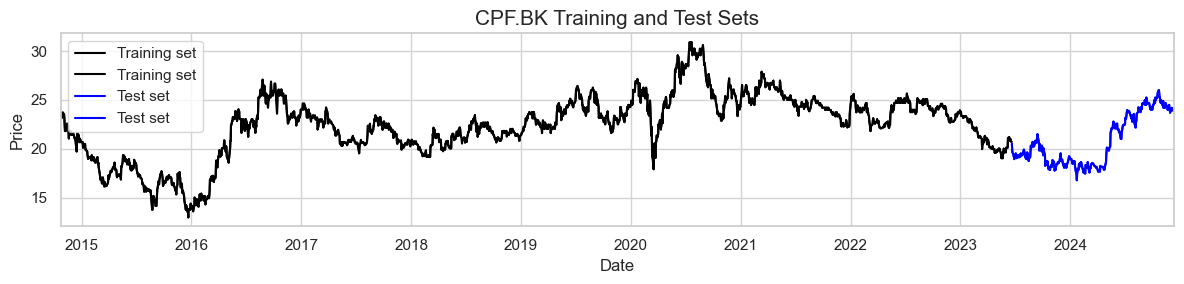

CPF.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
CPF.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: CPN.BK


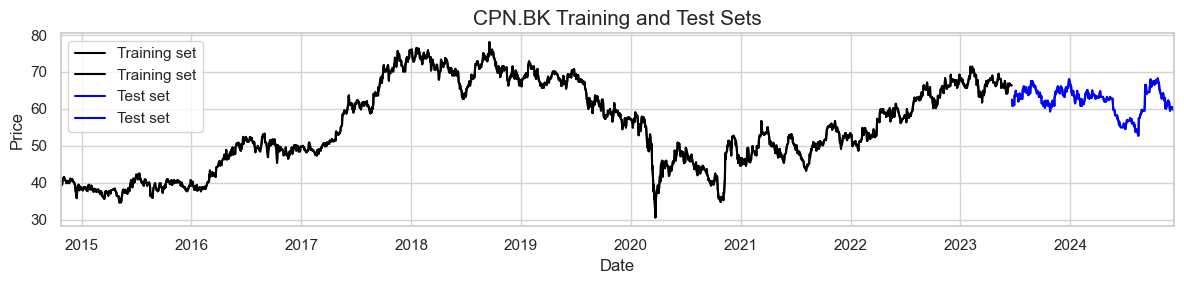

CPN.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
CPN.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: DELTA.BK


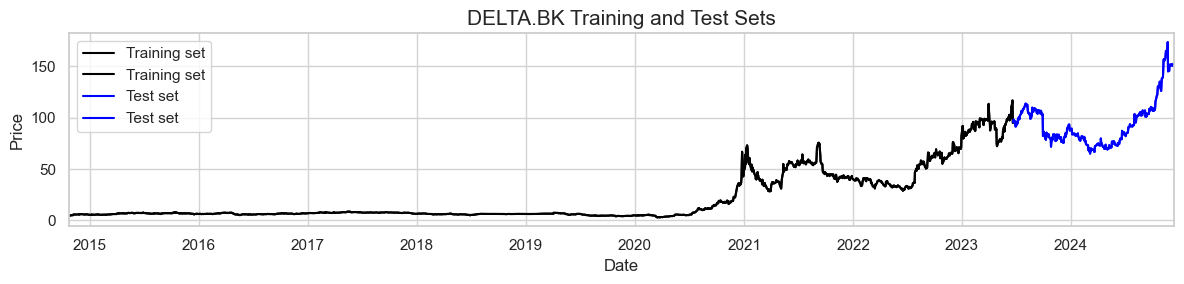

DELTA.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
DELTA.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: HMPRO.BK


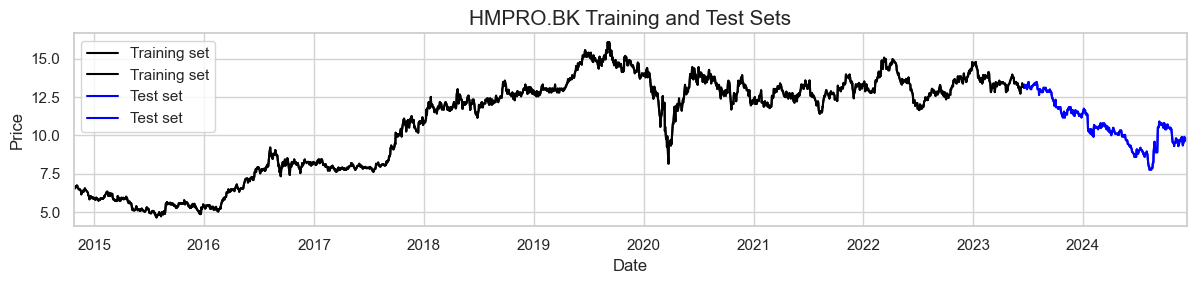

HMPRO.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
HMPRO.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: INTUCH.BK


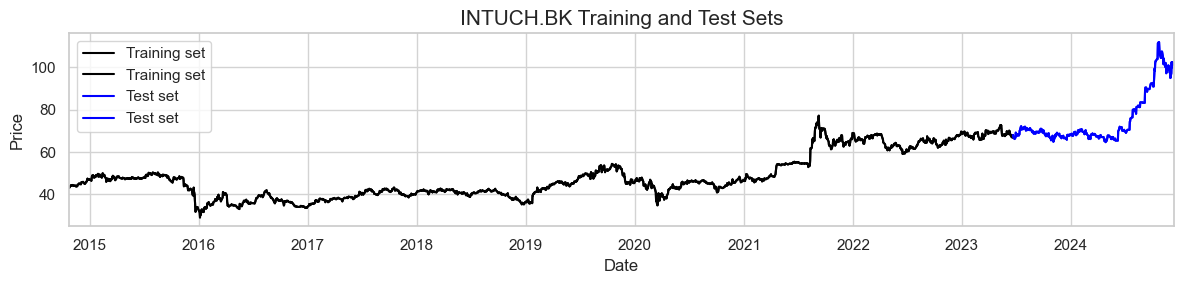

INTUCH.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
INTUCH.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: IVL.BK


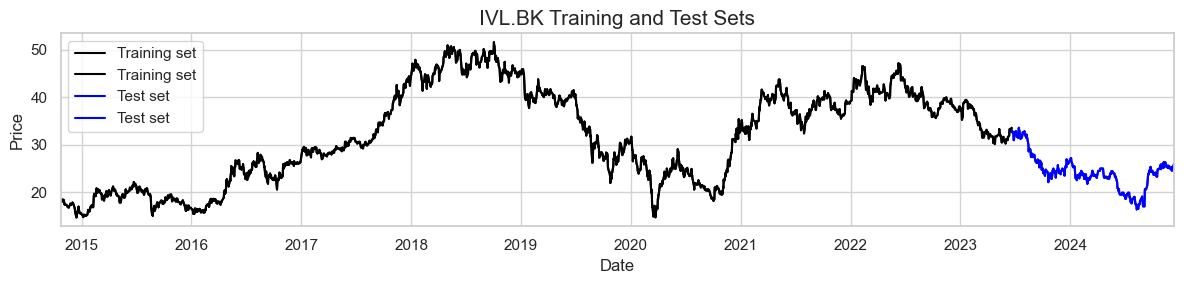

IVL.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
IVL.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: KBANK.BK


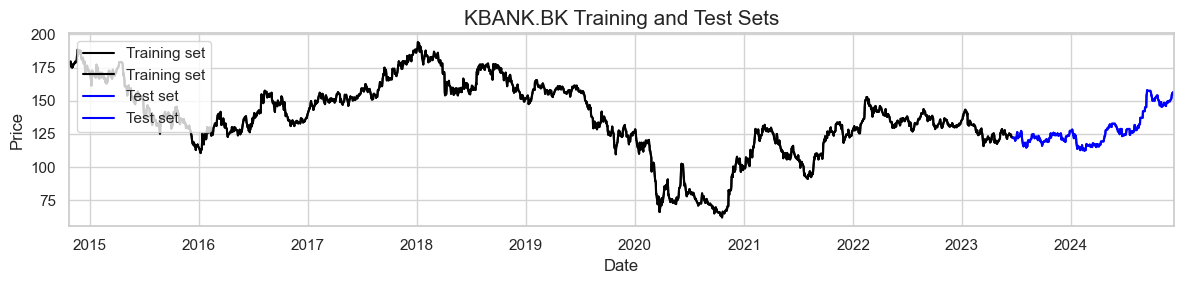

KBANK.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
KBANK.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: KTB.BK


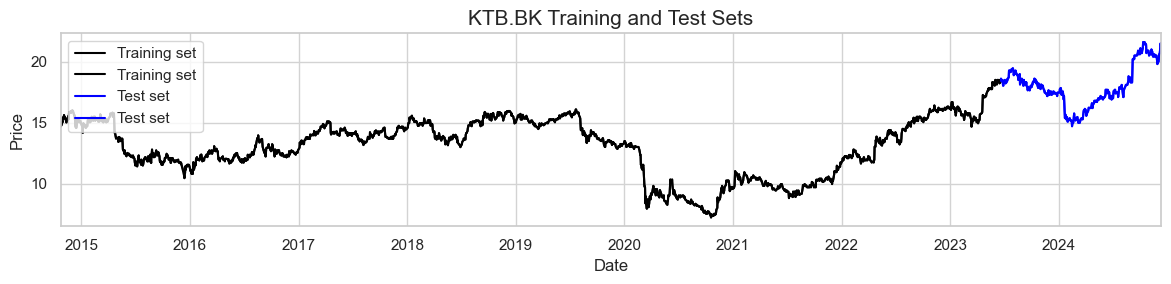

KTB.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
KTB.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: MINT.BK


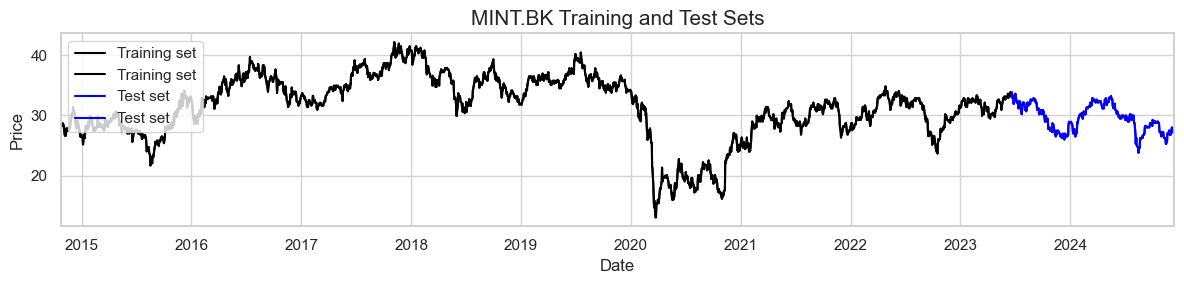

MINT.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
MINT.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: PTT.BK


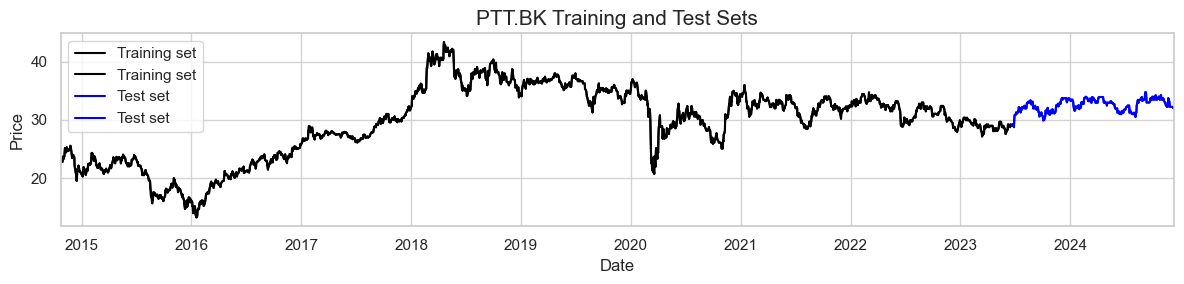

PTT.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
PTT.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: PTTEP.BK


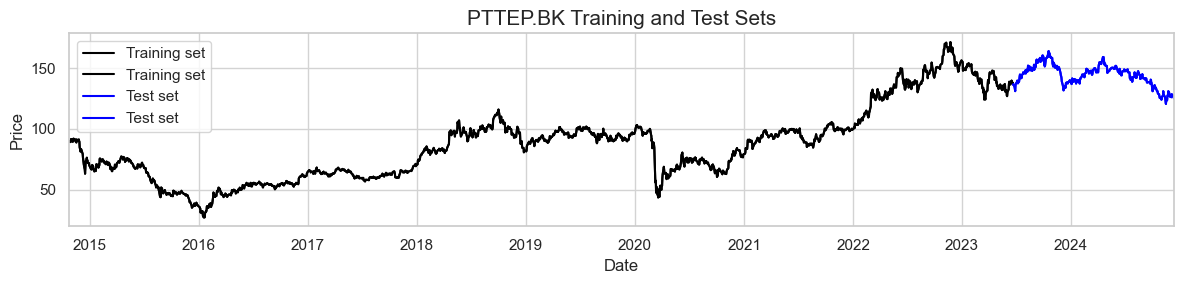

PTTEP.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
PTTEP.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: SCC.BK


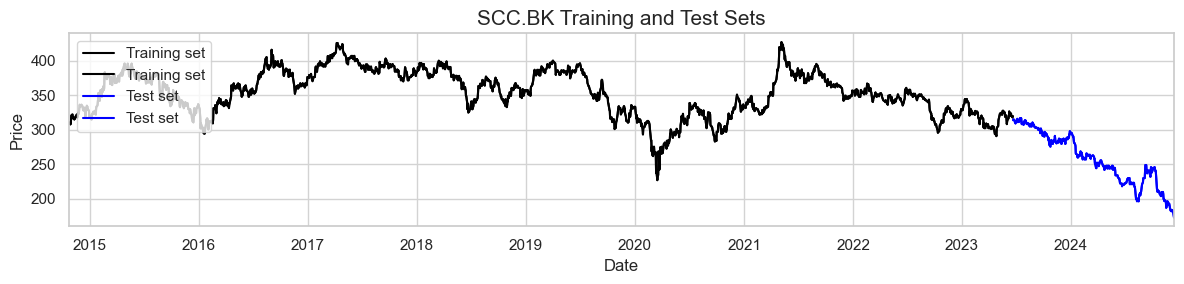

SCC.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
SCC.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: TRUE.BK


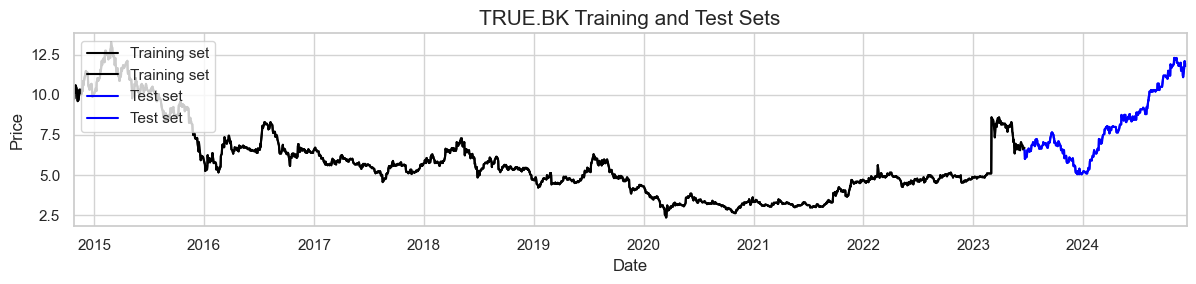

TRUE.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
TRUE.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: TTB.BK


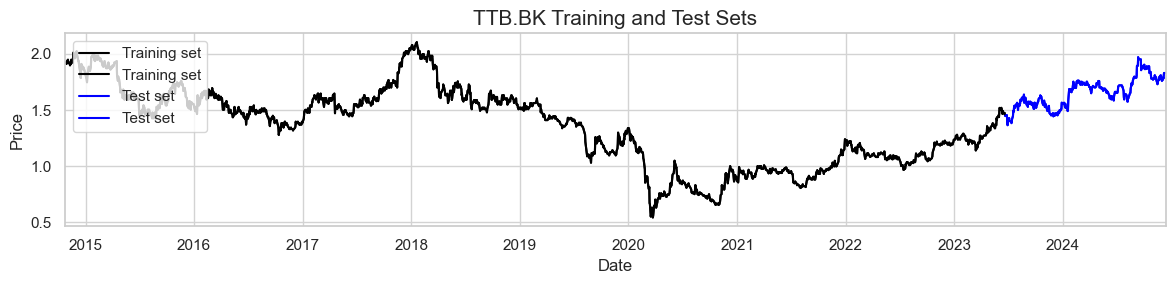

TTB.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
TTB.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)


In [21]:
# data preparation for dataframe set1
results = data_prep(df=df, stock_columns=stock_column, feature_columns=feature_columns_list,test_size=test_size, window_size=window_size)

**Create function for LSTM model and Training**

*Create the model*

In [24]:
# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def define_model(window_size, units_lstm_1, units_lstm_2, units_lstm_3, dropout_1, dropout_2, 
                 dropout_3, dense_units, optimizer_name, feature_columns):
    input1 = Input(shape=(window_size, feature_columns))  # Adjust for multiple features
    
    # First LSTM layer
    x = LSTM(units=units_lstm_1, return_sequences=True)(input1)  
    x = Dropout(dropout_1)(x)
    
    # Second LSTM layer
    x = LSTM(units=units_lstm_2, return_sequences=True)(x)
    x = Dropout(dropout_2)(x)
    
    # Third LSTM layer
    x = LSTM(units=units_lstm_3)(x)
    x = Dropout(dropout_3)(x)
    
    # Dense layer with dynamic units
    x = Dense(dense_units, activation='relu')(x)
    
    # Output layer
    dnn_output = Dense(1)(x)

    # Map optimizer name to optimizer object
    optimizer_mapping = {
        'adam': Adam(),
        'nadam': Nadam(),
        'rmsprop': RMSprop()
    }
    optimizer = optimizer_mapping.get(optimizer_name, Adam())
    
    # Compile the model
    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.summary()
    
    return model

**Find the best hyperparameters**

In [26]:
num_features = len(feature_columns_list)
num_features

204

In [27]:
def build_model(hp):
    input1 = Input(shape=(window_size, num_features))

    # Tune the number of units in LSTM layers
    x = LSTM(units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32), return_sequences=True)(input1)
    x = Dropout(hp.Float('dropout_layer_1', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    x = Dropout(hp.Float('dropout_layer_2', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_3', min_value=32, max_value=128, step=32))(x)
    x = Dropout(hp.Float('dropout_layer_3', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu')(x)
    dnn_output = Dense(1)(x)  

    # Define the model
    model = Model(inputs=input1, outputs=[dnn_output])

    # Tune the optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'nadam', 'rmsprop'])

    # Compile the model
    model.compile(optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mean_squared_error'])

    return model



In [28]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=2,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_tuning',
    overwrite=True)

In [29]:
for stock in stock_column:
    # Access the training and testing data for each stock
    X_train = results[stock]['X_train']
    X_test = results[stock]['X_test']
    y_train = results[stock]['y_train']
    y_test = results[stock]['y_test']


    print(f'{stock} - X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
    print(f'{stock} - X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}')


ADVANC.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
ADVANC.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
AOT.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
AOT.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
BBL.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
BBL.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
BDMS.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
BDMS.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
BH.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
BH.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
CPALL.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
CPALL.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
CPF.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
CPF.BK - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
CPN.BK - X_train Shape: (2043, 60, 205), y_train Shape: (2043, 1)
CPN.BK - X_test Shape: (360,

**Loop for all stocks name finding best hyperparameters, fit, and evaluate the model**

In [73]:
def find_fit_eva_multivariate(df, results, tuner, define_model, num_features, feature_columns, test_size ):
    test_size = 360  # Fixed test size for the last 360 rows
    t0 = time.time()
    
    hyperparameters_ = {}
    predictions_ = {}
    models_ = {}
    
    for stock in df.columns:
        print(f"\nProcessing {stock}")
        
        # Get the data and print initial shapes
        data = df[stock].values
        X_train = results[stock]['X_train'][:-test_size]
        y_train = results[stock]['y_train'][:-test_size]
        y_train_plot = results[stock]['y_train'][:-test_size]
        X_test = results[stock]['X_test'][-test_size:]
        y_test = results[stock]['y_test'][-test_size:]
        
        print(f"Original X_train shape: {X_train.shape}")
        
        # Store original dimensions
        original_samples = X_train.shape[0]
        original_timesteps = X_train.shape[1]
        original_features = X_train.shape[2]
        
        print(f"Original dimensions - Samples: {original_samples}, Timesteps: {original_timesteps}, Features: {original_features}")
        
        # Reshape to 2D using original dimensions
        X_train_2d = X_train.reshape(original_samples * original_timesteps, original_features)
        X_test_2d = X_test.reshape(X_test.shape[0] * X_test.shape[1], original_features)
        
        print(f"2D reshape shape: {X_train_2d.shape}")
        
        # Scale features
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_2d)
        X_test_scaled = scaler_X.transform(X_test_2d)
        
        print(f"After scaling shape: {X_train_scaled.shape}")
        
        # Reshape back to 3D using original dimensions
        X_train_scaled = X_train_scaled.reshape(original_samples, original_timesteps, original_features)
        X_test_scaled = X_test_scaled.reshape(X_test.shape[0], original_timesteps, original_features)
        
        print(f"Final 3D shape: {X_train_scaled.shape}")
        
        # Continue with model training
        print(f"Starting tuning for {stock}...")
        tuner.search(X_train_scaled, y_train,
                     epochs=1,
                     batch_size=32,
                     validation_split=0.2,
                     verbose=1)
        
        best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
        print(f"Best Hyperparameters for {stock}:\n {best_hyperparameters.values}")
        
        # Extract parameters
        units_lstm_1 = best_hyperparameters['units_layer_1']
        units_lstm_2 = best_hyperparameters['units_layer_2']
        units_lstm_3 = best_hyperparameters['units_layer_3']
        dropout_1 = best_hyperparameters['dropout_layer_1']
        dropout_2 = best_hyperparameters['dropout_layer_2']
        dropout_3 = best_hyperparameters['dropout_layer_3']
        dense_units = best_hyperparameters['dense_units']
        optimizer_name = best_hyperparameters['optimizer']
        
        # Save hyperparameters
        hyperparameters_dict = best_hyperparameters.values
        hyperparameters_[stock] = pd.DataFrame([hyperparameters_dict])
        
        # Define and train model using original feature dimension
        model = define_model(window_size=original_timesteps,
                             units_lstm_1=units_lstm_1,
                             units_lstm_2=units_lstm_2,
                             units_lstm_3=units_lstm_3,
                             dropout_1=dropout_1,
                             dropout_2=dropout_2,
                             dropout_3=dropout_3,
                             dense_units=dense_units,
                             optimizer_name=optimizer_name,
                             feature_columns=original_features)
        
        model.fit(X_train_scaled, y_train,
                  epochs=1,
                  batch_size=32,
                  validation_split=0.2,
                  verbose=1)
        
        # Evaluate
        test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
        y_pred = model.predict(X_test_scaled)
        print(f'Test loss for {stock}: {test_loss:.4f}')
        
        # Scale target data
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
        
        # Inverse transform predictions
        y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        y_test_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
        
        # Extract and scale training data
        train_data = df[stock].iloc[:-test_size].values
        train_data_scaled = scaler_y.transform(train_data.reshape(-1, 1))
        y_train = scaler_y.inverse_transform(train_data_scaled.reshape(-1, 1))
        
        predictions_[stock] = y_test_pred
        
        # Calculate metrics
        MSE = mean_squared_error(y_test_true, y_test_pred)
        RMSE = np.sqrt(MSE)
        print(f"Test MSE for {stock}: {MSE:.4f}")
        print(f"Test RMSE for {stock}: {RMSE:.4f}")

        # Plot results
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], y_train, color='black', label='Training Data')
        plt.plot(df.index[-test_size:], y_test_true, color='blue', label='Actual Test Data')
        plt.plot(df.index[-test_size:], y_test_pred, color='red', label='Predicted Test Data')
        plt.title(f'Model Performance on {stock} Prediction', fontsize=15)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend(loc='upper left')
        plt.show()
        plt.savefig(f'../images/{stock}_prediction_multi.png', format='png')

        models_[stock] = model
        
    print(f"Total time taken: {time.time() - t0} seconds")
    return hyperparameters_, predictions_, models_


In [75]:
SET1_results = find_fit_eva_multivariate(df=df, test_size=test_size, results=results, tuner=tuner, 
                                         define_model=define_model, num_features=num_features, feature_columns = feature_columns_list)


Processing ADVANC.BK
Original X_train shape: (1683, 60, 205)
Original dimensions - Samples: 1683, Timesteps: 60, Features: 205
2D reshape shape: (100980, 205)
After scaling shape: (100980, 205)
Final 3D shape: (1683, 60, 205)
Starting tuning for ADVANC.BK...
Best Hyperparameters for ADVANC.BK:
 {'units_layer_1': 128, 'dropout_layer_1': 0.4, 'units_layer_2': 64, 'dropout_layer_2': 0.4, 'units_layer_3': 64, 'dropout_layer_3': 0.4, 'dense_units': 48, 'optimizer': 'nadam'}


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 60, 205)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 60, 128)        │       171,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,609 (1002.38 KB)

 Trainable params: 256,609 (1002.38 KB)

 Non-trainable params: 0 (0.00 B)

43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0226 - val_loss: 0.0024
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Test loss for ADVANC.BK: 0.0807


ValueError: can only specify one unknown dimension

**Saving Model**

In [ ]:
# SET1_results[0] into a single DataFrame
SET1_results_df = pd.concat(
    [df.assign(stock=stock) for stock, df in SET1_results[0].items()],
    ignore_index=True)

# Export
SET1_results_df.to_csv("../Data/SET1_hyper_multi_df.csv", index=False)

In [ ]:
predictions = SET1_results[1]
predictions_df = pd.DataFrame({stock: pred.ravel() for stock, pred in predictions.items()})

# Export
predictions_df.to_csv("../Data/predictions_set_multi.csv", index=False)

In [ ]:
import keras
import os
models_ = SET1_results[2]
# Creating a directory to save models
os.makedirs('models', exist_ok=True)

# Loop through each stock model
for stock, model in models_.items():
    model_filename = f'models/{stock}_model_multi.keras' 
    model.save(model_filename)
    print(f"Model for {stock} saved to {model_filename}")

**Expected Return**

In [ ]:
forecasted_returns_pct_list = []
for column in predictions_df.columns:
    # Correctly get the first and last value using .iloc
    forecasted_returns = (predictions_df[column].iloc[-1] - predictions_df[column].iloc[0]) / predictions_df[column].iloc[0]
    forecasted_returns_pct = forecasted_returns * 100
    forecasted_returns_pct_list.append(forecasted_returns_pct)

# Create a DataFrame from the list
forecasted_returns_df = pd.DataFrame(forecasted_returns_pct_list, index=predictions_df.columns, columns=["Expected Return (%)"])

# Find the top 10 highest returns
top_10_returns = forecasted_returns_df.sort_values(by="Expected Return (%)", ascending=False).head(10)
top_10_returns.to_csv("../Data/top_10_returns_SET1_multi.csv")